In [1]:
from sentiment import train_data, test_data
import kagglehub
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import matplotlib
import numpy as np
import seaborn
import textblob
import nltk
import wordcloud


C:\Users\uttka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\uttka\.cache\kagglehub\datasets\abhi8923shriv\sentiment-analysis-dataset\versions\9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [3]:
train_data.columns


Y = train_data["sentiment"]
Y

# Drop the 'sentiment' column to get all other columns
X = train_data.drop(columns=["sentiment"])



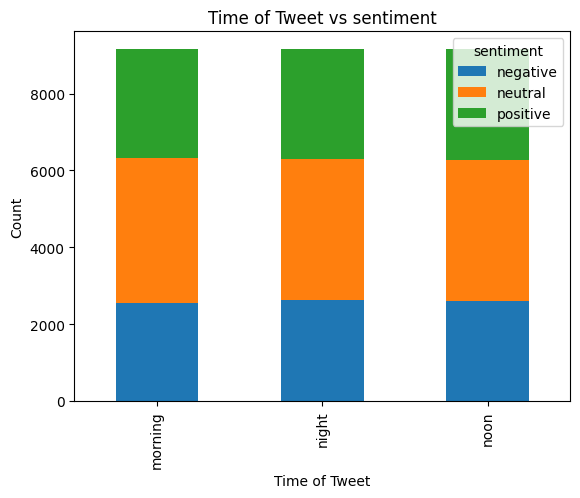

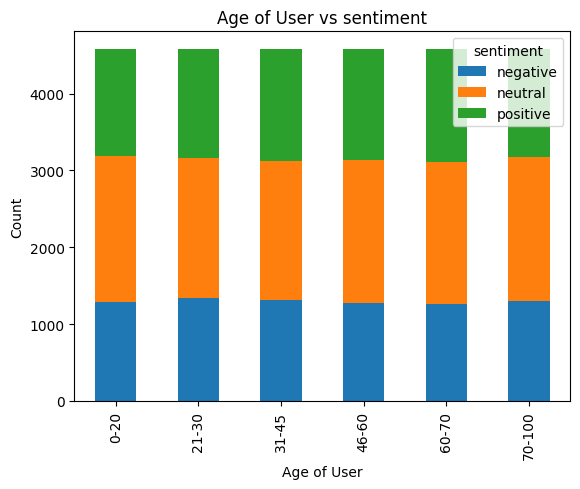

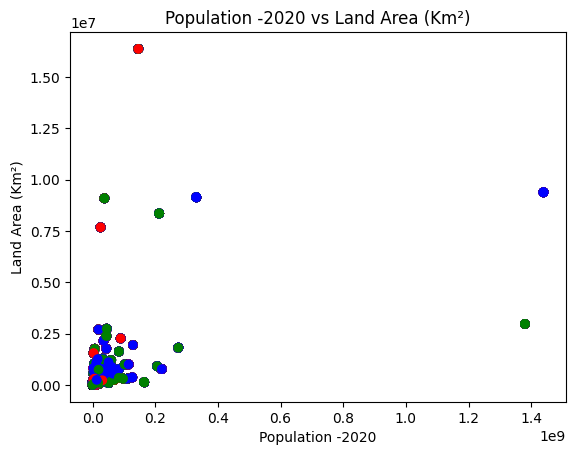

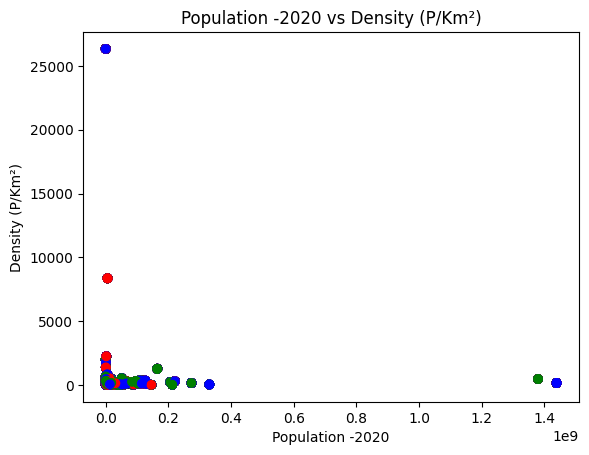

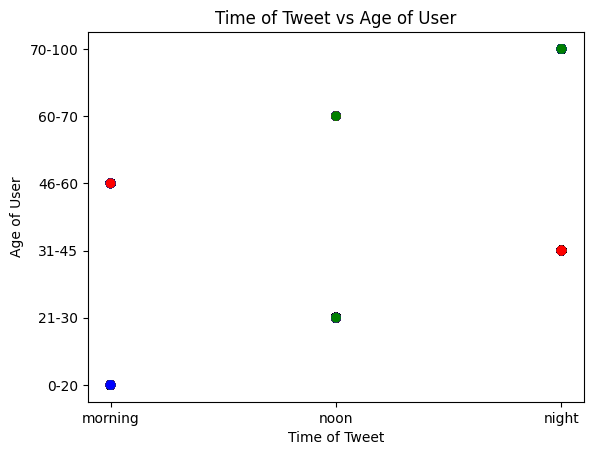

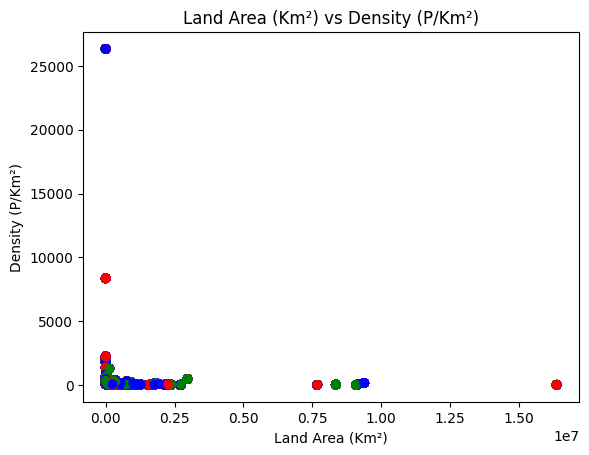

In [4]:
import matplotlib.pyplot as plt

# Group by 'Time of Tweet' and 'sentiment' and count the occurrences
def display_sentiment_vs_col(col: str):
    tweet_sentiment_counts = train_data.groupby([col, 'sentiment']).size().unstack()

    # Plot the bar chart
    tweet_sentiment_counts.plot(kind='bar', stacked=True)
    plt.title(col +' vs sentiment')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
def display_value_vs_sentiment(col1: str, col2: str):
    colors = {'negative': 'red', 'neutral': 'blue', 'positive': 'green'}
    plt.scatter(train_data[col1], train_data[col2], c = train_data['sentiment'].apply(lambda x: colors[x]))
    plt.title(col1 + " vs " + col2)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
display_sentiment_vs_col("Time of Tweet")
display_sentiment_vs_col("Age of User")
display_value_vs_sentiment("Population -2020", "Land Area (Km²)")
display_value_vs_sentiment("Population -2020", "Density (P/Km²)")
display_value_vs_sentiment("Time of Tweet", "Age of User")
display_value_vs_sentiment("Land Area (Km²)", "Density (P/Km²)")

In [5]:
# based on our graphs, we can see that the time of tweet and age of user averiables are independent from the sentiment variable
sentiment_choices = np.unique(train_data["sentiment"])
age_choices = np.unique(train_data["Age of User"])
time_choices = np.unique(train_data["Time of Tweet"])

for age in age_choices:
    for time in time_choices:
        time_age = train_data[(train_data["Age of User"] == age) & (train_data["Time of Tweet"] == time)]
        positive_count = np.size(time_age[time_age["sentiment"] == "positive"])
        neutral_count = np.size(time_age[time_age["sentiment"] == "neutral"])
        negative_count = np.size(time_age[time_age["sentiment"] == "negative"])
        total_count = np.size(time_age)
        
        if total_count > 0:
            net_positivity = (positive_count - negative_count) / total_count
            print(f"Net positivity percentage of {time} time and {age} age group is {net_positivity:.2%}")
        else:
            print(f"No data for {time} time and {age} age group.")



Net positivity percentage of morning time and 0-20 age group is 2.25%
No data for night time and 0-20 age group.
No data for noon time and 0-20 age group.
No data for morning time and 21-30 age group.
No data for night time and 21-30 age group.
Net positivity percentage of noon time and 21-30 age group is 1.70%
No data for morning time and 31-45 age group.
Net positivity percentage of night time and 31-45 age group is 2.97%
No data for noon time and 31-45 age group.
Net positivity percentage of morning time and 46-60 age group is 3.78%
No data for night time and 46-60 age group.
No data for noon time and 46-60 age group.
No data for morning time and 60-70 age group.
No data for night time and 60-70 age group.
Net positivity percentage of noon time and 60-70 age group is 4.43%
No data for morning time and 70-100 age group.
Net positivity percentage of night time and 70-100 age group is 2.36%
No data for noon time and 70-100 age group.


In [5]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# ✅ Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()
def preprocess_string(text: str):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    token_words = word_tokenize(text) # how to manually do this: use split string method to split by space, then replace non word characters with space and then all extra spaces with nothing
    token_words = [i for i in token_words if i not in stopwords.words('english')] # and then manually go through the stopwords - words that add no meaning - and remove all occurances from the list

    # Print the tokenized words

    # Perform POS (Part of Speech) tagging on the tokenized words
    pos_tagged = nltk.pos_tag(token_words) # tag each word with its part of speech

    # Lemmatize the words based on their POS tags
    processed_words = [lemmatizer.lemmatize(word, get_pos(tag)) for word, tag in pos_tagged] # get to the root stem of the word (ex: eating -> eat, better -> good)

    # Join the processed words back into a single string
    return " ".join(processed_words)

#another function created to simplify the pos tagging process into only 5 categories 
def get_pos(pos: str):
    match pos[0]:
        case "J":
            return wordnet.ADJ
        case "N":
            return wordnet.NOUN
        case "V":
            return wordnet.VERB
        case "R":
            return wordnet.ADV
        case _:
            return wordnet.NOUN

X_train

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uttka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\uttka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\uttka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uttka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,textID,text,selected_text,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,night,70-100,Guatemala,17915568,107160.0,167


In [7]:
# process all text data, delete useless columns and one-hot encode the other columns
X = X.drop(columns=["textID", "Country", "Population -2020", "Land Area (Km²)", "Density (P/Km²)"])
new_text, new_selected_text= [], []
age_0, age_21, age_31, age_46, age_60, age_70 = [], [], [], [], [], []
morning, night, noon = [], [], []
for i in range(len(X["text"])):
    if not isinstance(X["text"][i], str):
        new_text.append("")
    else:
        new_text.append(preprocess_string(X["text"][i]))
    if not isinstance(X["selected_text"][i], str):
        new_selected_text.append("")
    else:
        new_selected_text.append(preprocess_string(X["selected_text"][i]))
    
    

    age_0.append(int(X["Age of User"][i] == "0-20"))
    age_21.append(int(X["Age of User"][i] == "21-30"))
    age_31.append(int(X["Age of User"][i] == "31-45"))
    age_46.append(int(X["Age of User"][i] == "46-60"))
    age_60.append(int(X["Age of User"][i] == "60-70"))
    age_70.append(int(X["Age of User"][i] == "70-100"))

    morning.append(int(X["Time of Tweet"][i] == "morning"))
    noon.append(int(X["Time of Tweet"][i] == "noon"))
    night.append(int(X["Time of Tweet"][i] == "night"))


X["text"] = new_text
X["selected_text"] = new_selected_text
X["21-30"] = age_21
X["31-45"] = age_31
X["46-60"] = age_46
X["60-70"] = age_60
X["70-100"] = age_70
X["morning"] = morning
X["noon"] = noon
X["night"] = night
X.drop(columns=["Time of Tweet", "Age of User"])
X

,text,selected_text,Time of Tweet,Age of User,21-30,31-45,46-60,60-70,70-100,morning,noon,night
0,"` respond , go","` respond , go",morning,0-20,0,0,0,0,0,1,0,0
1,sooo sad miss san diego ! ! !,sooo sad,noon,21-30,1,0,0,0,0,0,1,0
2,bos bullying ...,bullying,night,31-45,0,1,0,0,0,0,0,1
3,interview ! leave alone,leave alone,morning,46-60,0,0,1,0,0,1,0,0
4,"son * * * * , ` put release already buy","son * * * * ,",noon,60-70,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27476,wish could come see u denver husband lose job ...,lose,night,31-45,0,1,0,0,0,0,0,1
27477,"` wondered rake . client make clear .net , ` f...",", ` force",morning,46-60,0,0,1,0,0,1,0,0
27478,yay good . enjoy break - probably need hectic ...,yay good .,noon,60-70,0,0,0,1,0,0,1,0
27479,worth * * * * .,worth * * * * .,night,70-100,0,0,0,0,1,0,0,1


In [13]:
X.to_csv('processed_X_train.csv', index=False)

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import emoji

# Load the processed data
X = pd.read_csv('processed_X_train.csv')

# Handle NaN values by filling them with an empty string
X["text"] = X["text"].fillna("")
X["selected_text"] = X["selected_text"].fillna("")

# Ensure all values are strings
X["text"] = X["text"].astype(str)
X["selected_text"] = X["selected_text"].astype(str)

# Re-read the data with proper encoding
texts = X["text"].apply(lambda x: emoji.demojize(x) if isinstance(x, str) else x)
selected_texts = X["selected_text"].apply(lambda x: emoji.demojize(x) if isinstance(x, str) else x)

# Initialize the vectorizer
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()

# Fit and transform the data
X_tfidf = vectorizer1.fit_transform(texts)
X_selected_tfidf = vectorizer2.fit_transform(selected_texts)

# Convert to array for better readability
X_tfidf_array = X_tfidf.toarray()
X_selected_tfidf_array = X_selected_tfidf.toarray()

# Calculate the mean of the vectors
new_text = [vector.mean() for vector in X_tfidf_array]
new_selected_text = [vector.mean() for vector in X_selected_tfidf_array]

# Update the DataFrame
X["text"] = new_text
X["selected_text"] = new_selected_text

# Drop unnecessary columns
X = X.drop(columns=["Time of Tweet", "Age of User"])

X

,text,selected_text,21-30,31-45,46-60,60-70,70-100,morning,noon,night
0,0.000055,0.000085,0,0,0,0,0,1,0,0
1,0.000091,0.000089,1,0,0,0,0,0,1,0
2,0.000059,0.000064,0,1,0,0,0,0,0,1
3,0.000072,0.000090,0,0,1,0,0,1,0,0
4,0.000093,0.000064,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
27476,0.000122,0.000064,0,1,0,0,0,0,0,1
27477,0.000147,0.000064,0,0,1,0,0,1,0,0
27478,0.000141,0.000088,0,0,0,1,0,0,1,0
27479,0.000042,0.000064,0,0,0,0,1,0,0,1


In [16]:
from sklearn.model_selection import train_test_split

#creating train and testing data from current data available
x_test, x_train, y_test, y_train = train_test_split(X, Y, train_size=0.2)

x_train


,text,selected_text,21-30,31-45,46-60,60-70,70-100,morning,noon,night
6431,0.000042,0.000064,0,0,0,0,1,0,0,1
1588,0.000090,0.000064,0,0,0,1,0,0,1,0
7277,0.000099,0.000090,0,0,0,0,1,0,0,1
16375,0.000100,0.000064,1,0,0,0,0,0,1,0
10517,0.000119,0.000064,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15814,0.000092,0.000090,0,0,0,1,0,0,1,0
17661,0.000115,0.000175,0,0,1,0,0,1,0,0
24470,0.000090,0.000138,0,1,0,0,0,0,0,1
776,0.000082,0.000090,0,1,0,0,0,0,0,1


In [20]:
#After vectorizing the data, let's try using linear regression to predict the values
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



def run_logistic_regression(x_train, y_train):
    # Define the pipeline
    pipeline = Pipeline([   #
        ('scaler', MinMaxScaler()),                      # Step 2: Scale features
        ('model', LogisticRegression(max_iter=1000))     # Step 3: Train model
    ])

    # Fit the pipeline on training data
    pipeline.fit(x_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(x_test)

    # Evaluate performance
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

run_logistic_regression(x_train, y_train)

Accuracy: 0.65


Accuracy isn't as strong. Here's some things worth trying -
Run it with only the text columns
Use a different classifier
Use a different vectorizer 
Run different hyperparameters

In [ ]:
X_text = X[["text", "selected_text"]]
x_test, x_train, y_test, y_train = train_test_split(X, Y, train_size=0.2)
run_logistic_regression(x_train, y_train)

Accuracy: 0.65


That didn't work, let's try changing the classifier

In [6]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def run_classifier(clf, x_train, y_train):
    # Define the pipeline
    pipeline = Pipeline([   #
        ('scaler', MinMaxScaler()),                      # Step 2: Scale features
        ('model', clf)     # Step 3: Train model
    ])

    # Fit the pipeline on training data
    pipeline.fit(x_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(x_test)

    # Evaluate performance
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Run classifiers
print("Logistic Regression:")
run_classifier(LogisticRegression(C = 100, penalty = "l1",solver = "liblinear", max_iter=10000), x_train, y_train)

print("Random Forest Classifier:")
run_classifier(RandomForestClassifier(), x_train, y_train)

print("Multinomial Naive Bayes:")
run_classifier(MultinomialNB(), x_train, y_train)

print("Support Vector Classifier:")
run_classifier(SVC(), x_train, y_train)

print("Decision Tree Classifier:")
run_classifier(DecisionTreeClassifier(), x_train, y_train)

print("Gradient Boosting Classifier:")
run_classifier(GradientBoostingClassifier(), x_train, y_train)

Logistic Regression:
Accuracy: 0.80
Random Forest Classifier:
Accuracy: 0.81
Multinomial Naive Bayes:
Accuracy: 0.60
Support Vector Classifier:
Accuracy: 0.81
Decision Tree Classifier:
Accuracy: 0.72
Gradient Boosting Classifier:
Accuracy: 0.81


That didn't work either, let's try using grid search for hyperparameter tuning

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Initialize the model
model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate the model on the test set
Y_pred = grid_search.predict(x_test)
print(classification_report(y_test, Y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.636206504434842
              precision    recall  f1-score   support

    negative       0.42      0.01      0.02      1489
     neutral       0.76      0.96      0.85      2264
    positive       0.53      0.78      0.63      1743

    accuracy                           0.65      5496
   macro avg       0.57      0.59      0.50      5496
weighted avg       0.59      0.65      0.56      5496



Grid search still didn't improve our accuracy. Before trying word embeddings or other more sophisticated models, let's first try feature engineering and adding some columns to give the classifier more context

In [4]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import nltk


# Load the processed data
new_X = pd.read_csv('processed_X_train.csv')

# Handle NaN values by filling them with an empty string
X["text"] = X["text"].fillna("")
X["selected_text"] = X["selected_text"].fillna("")

# Ensure all values are strings
X["text"] = X["text"].astype(str)
X["selected_text"] = X["selected_text"].astype(str)

# Add word count features
X['text_word_count'] = X['text'].apply(lambda x: len(x.split()))
X['selected_word_count'] = X['selected_text'].apply(lambda x: len(x.split()))

# Add sentiment score features
X['text_sentiment'] = X['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
X['selected_text_sentiment'] = X['selected_text'].apply(lambda x: TextBlob(x).sentiment.polarity)



def pos_tag_counts(text):
    tokens = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    pos_counts = nltk.FreqDist(tag for (word, tag) in pos_tags)
    return pos_counts

X['noun_count'] = X['text'].apply(lambda x: pos_tag_counts(x).get('NN', 0))
X['verb_count'] = X['text'].apply(lambda x: pos_tag_counts(x).get('VB', 0))
X['adj_count'] = X['text'].apply(lambda x: pos_tag_counts(x).get('JJ', 0))

X['exclamation_count'] = X['text'].apply(lambda x: x.count('!'))
X['question_count'] = X['text'].apply(lambda x: x.count('?'))
X['comma_count'] = X['text'].apply(lambda x: x.count(','))


# Use the new_X DataFrame for the text and selected_text columns
X["text"] = new_X["text"]
X["selected_text"] = new_X["selected_text"]

# Drop unnecessary columns
#X = X.drop(columns=["textID", "Country", "Population -2020", "Land Area (Km²)", "Density (P/Km²)", "Time of Tweet", "Age of User"])

# Ensure all values are numeric before scaling
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



# Drop the target column from X


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Initialize and train the model
clf = LogisticRegression(C=100, solver='liblinear')
clf.fit(x_train, y_train)

# Make predictions
y_pred = clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\uttka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Accuracy: 0.8020738584682554
              precision    recall  f1-score   support

    negative       0.74      0.74      0.74      1562
     neutral       0.82      0.94      0.87      2230
    positive       0.84      0.69      0.75      1705

    accuracy                           0.80      5497
   macro avg       0.80      0.79      0.79      5497
weighted avg       0.80      0.80      0.80      5497

